Importing required packages, loading datasets, and observing data formatting.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
cust_features = pd.read_csv("features_data.csv")
cust_balances = pd.read_csv("equity_value_data.csv")
cust_features

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,user_id
0,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,33.129417,stock,40.0,med_time_horizon,895044c23edc821881e87da749c01034
1,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,16.573517,stock,200.0,short_time_horizon,458b1d95441ced242949deefe8e4b638
2,med_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,10.008367,stock,25.0,long_time_horizon,c7936f653d293479e034865db9bb932f
3,med_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,1.031633,stock,100.0,short_time_horizon,b255d4bd6c9ba194d3a350b3e76c6393
4,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.187250,stock,20.0,long_time_horizon,4a168225e89375b8de605cbc0977ae91
...,...,...,...,...,...,...,...,...,...
5579,high_risk_tolerance,limited_investment_exp,very_important_liq_need,Android,8.339283,stock,300.0,long_time_horizon,03880c726d8a4e5db006afe4119ad974
5580,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,7.241383,stock,100.0,short_time_horizon,ae8315109657f44852b24c6bca4decd6
5581,med_risk_tolerance,no_investment_exp,very_important_liq_need,both,22.967167,stock,50.0,short_time_horizon,f29c174989f9737058fe808fcf264135
5582,med_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,10.338417,stock,100.0,long_time_horizon,24843497d1de88b2e7233f694436cb3a


Reindexing customer profile data by user ID and sorting alphabetically.

In [3]:
cust_features = cust_features.set_index("user_id").sort_index()
cust_features

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon
user_id,,,,,,,,
0012db34aa7b083f5714e7831195e54d,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon
001d6c77dbdb3213cead7673f250bfdc,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon
002e4653171ddc61c3cd30603cd7bd3e,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon
00384fa9be6fdca1b786bae70d78f88f,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon
0042aac295a0d4df88f4b83012778bd4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon
...,...,...,...,...,...,...,...,...
ff9ee08791e20724a86995ab2bc72578,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon
ffa12d2f97e310910291f9b26fb2318d,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon
ffae713096867a32e74f633060667153,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon


Observing customer equity data formatting, reformatting timestamp data to correct data type, identifying end date of data collection, and sorting instances by user ID and timestamp.

In [4]:
cust_balances

,timestamp,close_equity,user_id
0,2016-11-16T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
1,2016-11-17T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
2,2016-11-18T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
3,2016-11-21T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
4,2016-11-22T00:00:00Z,48.16,bcef4fa9b0bdf22bcf7deae708decf03
...,...,...,...
1119153,2017-08-14T00:00:00Z,2270.71,98580360c4fb5b0ec511cd87f0d429ed
1119154,2017-08-15T00:00:00Z,2275.02,98580360c4fb5b0ec511cd87f0d429ed
1119155,2017-08-16T00:00:00Z,2282.03,98580360c4fb5b0ec511cd87f0d429ed
1119156,2017-08-17T00:00:00Z,2237.45,98580360c4fb5b0ec511cd87f0d429ed


In [5]:
cust_balances.timestamp = cust_balances.timestamp.astype("datetime64[ns]")
end_date = cust_balances.timestamp.iloc[-1]
cust_balances = cust_balances.sort_values(by=["user_id", "timestamp"])
cust_balances.head(11)

,timestamp,close_equity,user_id
505994,2016-08-18,1211.6055,0012db34aa7b083f5714e7831195e54d
505995,2016-08-19,1173.5640,0012db34aa7b083f5714e7831195e54d
505996,2016-08-22,1253.0597,0012db34aa7b083f5714e7831195e54d
505997,2016-08-23,1252.9050,0012db34aa7b083f5714e7831195e54d
505998,2016-08-24,1262.1360,0012db34aa7b083f5714e7831195e54d
505999,2016-08-25,1226.4250,0012db34aa7b083f5714e7831195e54d
506000,2016-08-26,1227.9610,0012db34aa7b083f5714e7831195e54d
506001,2016-08-29,1250.9700,0012db34aa7b083f5714e7831195e54d
506002,2016-08-30,1248.1000,0012db34aa7b083f5714e7831195e54d
506003,2016-08-31,1241.5560,0012db34aa7b083f5714e7831195e54d


Collecting aggregated statistics for customer equity data. Identifying and correcting missing or irregular datapoints.

In [6]:
balance_stats = cust_balances[["user_id", "close_equity"]].groupby("user_id").agg(["count", "mean", "std", "min", "max"]).sort_index()
balance_stats.columns = balance_stats.columns.to_flat_index()
balance_stats.columns = [x[1] for x in balance_stats.columns]
balance_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5584 entries, 0012db34aa7b083f5714e7831195e54d to ffc1e622f3a0b2666f09a6dcb7f27918
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   5584 non-null   int64  
 1   mean    5584 non-null   float64
 2   std     5580 non-null   float64
 3   min     5584 non-null   float64
 4   max     5584 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 261.8+ KB


In [7]:
balance_stats = balance_stats.fillna(0)
print(balance_stats.info())
balance_stats

<class 'pandas.core.frame.DataFrame'>
Index: 5584 entries, 0012db34aa7b083f5714e7831195e54d to ffc1e622f3a0b2666f09a6dcb7f27918
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   5584 non-null   int64  
 1   mean    5584 non-null   float64
 2   std     5584 non-null   float64
 3   min     5584 non-null   float64
 4   max     5584 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 261.8+ KB
None


,count,mean,std,min,max
user_id,,,,,
0012db34aa7b083f5714e7831195e54d,252,609.100576,191.975127,355.3723,1262.1360
001d6c77dbdb3213cead7673f250bfdc,252,3307.140361,449.330147,2693.0400,4030.4577
002e4653171ddc61c3cd30603cd7bd3e,128,117.203750,6.480472,100.0000,134.3800
00384fa9be6fdca1b786bae70d78f88f,124,462.786815,24.522490,414.4200,518.0000
0042aac295a0d4df88f4b83012778bd4,252,1561.098745,933.690027,123.5265,2559.1550
...,...,...,...,...,...
ff9ee08791e20724a86995ab2bc72578,252,92.444723,47.137114,57.7617,259.4046
ffa12d2f97e310910291f9b26fb2318d,252,6064.207556,1577.089485,2661.6500,8486.5050
ffae713096867a32e74f633060667153,224,20.166519,7.194193,16.5600,37.5200


In [8]:
set(cust_features.index) - set(balance_stats.index)

set()

Quantifying the gap between each timestamp in the dataset, including the gap between the final timestamp for each user and the final date of data collection.

In [9]:
cust_balances["time_gap"] = cust_balances.timestamp.diff(-1).dt.days.fillna(0).astype("int64") * -1
cust_balances

,timestamp,close_equity,user_id,time_gap
505994,2016-08-18,1211.6055,0012db34aa7b083f5714e7831195e54d,1
505995,2016-08-19,1173.5640,0012db34aa7b083f5714e7831195e54d,3
505996,2016-08-22,1253.0597,0012db34aa7b083f5714e7831195e54d,1
505997,2016-08-23,1252.9050,0012db34aa7b083f5714e7831195e54d,1
505998,2016-08-24,1262.1360,0012db34aa7b083f5714e7831195e54d,1
...,...,...,...,...
675754,2017-08-14,2156.2400,ffc1e622f3a0b2666f09a6dcb7f27918,1
675755,2017-08-15,2134.7100,ffc1e622f3a0b2666f09a6dcb7f27918,1
675756,2017-08-16,2152.1200,ffc1e622f3a0b2666f09a6dcb7f27918,1
675757,2017-08-17,2042.2800,ffc1e622f3a0b2666f09a6dcb7f27918,1


In [10]:
cust_balances[cust_balances.time_gap < 0]

,timestamp,close_equity,user_id,time_gap
506245,2017-08-17,487.7885,0012db34aa7b083f5714e7831195e54d,-364
417392,2017-08-17,3981.3350,001d6c77dbdb3213cead7673f250bfdc,-182
1010028,2017-08-18,134.3800,002e4653171ddc61c3cd30603cd7bd3e,-176
629750,2017-08-18,426.2400,00384fa9be6fdca1b786bae70d78f88f,-365
417644,2017-08-17,1769.2150,0042aac295a0d4df88f4b83012778bd4,-230
...,...,...,...,...
750576,2017-08-18,16790.4700,ff98cbc9633a9255a711d02ebc1e8294,-365
455492,2017-08-17,62.1951,ff9ee08791e20724a86995ab2bc72578,-365
226399,2017-08-16,7448.1895,ffa12d2f97e310910291f9b26fb2318d,-322
341092,2017-08-17,32.9300,ffae713096867a32e74f633060667153,-183


In [11]:
cust_balances.time_gap = cust_balances.apply(lambda x: (end_date - x.timestamp).days if x.time_gap < 0 else x.time_gap, axis=1)

Identifying the customers with at least one 28-day gap between timestamps in their equity data, and counting the number of those gaps for each customer.

In [12]:
cust_churns = cust_balances[cust_balances.time_gap >= 28]
cust_churns

,timestamp,close_equity,user_id,time_gap
152685,2017-02-27,59.4500,00440034cc4152bfb01b30f5c381c4e3,80
959321,2017-04-28,25.1400,004aab1640f3a04b87b1f404fb4c018d,112
1042837,2017-07-10,100.9800,004ea9d7662aa8dc840bbff212cfa4b8,39
293708,2016-11-04,178.8797,005d630a68b4ab3a2f4cd49d9a87c50d,123
161451,2017-05-19,1143.6600,00f89f56f25989b0bb7ea05bac2dccc4,91
...,...,...,...,...
955338,2017-04-03,575.3300,ff0ae95285c43e3a5af84860bffaa544,81
857073,2016-09-29,1001.2500,ff377467d4e28b425266a8b2c8b2f5c7,60
447016,2017-03-06,16.8000,ff6d64d75fa2ffd703dabf66b7b86b99,165
29165,2017-01-12,17.1700,ff7610fdd7ac5cbfa0b17aca53af5db4,172


In [13]:
cust_churn_count = cust_churns.user_id.value_counts()
cust_churn_count

50b846ab40078ae27b0bf7d6004c9a28    3
9121bbdb811bcb10de9b6f85b2b5e458    3
14b44db6ff01a66a284d6d4a62975706    3
4db4db8398496203a7def94692739f86    3
ec781fbc977db5d88af48e5304d5da41    3
                                   ..
57d9b22067d7b0312f0cd6ba73d44743    1
5813f69ba4430325260e394908a937ab    1
582e57386c12abb201c6d620786800d3    1
58756af245e132e09b91e4acfbcb8dd1    1
ff98cbc9633a9255a711d02ebc1e8294    1
Name: user_id, Length: 1003, dtype: int64

Labeling the customers with at least one gap of 28 days or more as churned customers, and labeling those without as non-churned customers. Quantifying the proportion of churned customers in the overall dataset.

In [14]:
cust_features["churned"] = cust_features.apply(lambda x: 1 if x.name in cust_churn_count.index else 0, axis=1)
cust_features[cust_features.churned == 1]

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,churned
user_id,,,,,,,,,
00440034cc4152bfb01b30f5c381c4e3,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,33.999300,stock,10.00,short_time_horizon,1
004aab1640f3a04b87b1f404fb4c018d,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,24.611400,stock,7.97,long_time_horizon,1
004ea9d7662aa8dc840bbff212cfa4b8,med_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,1.172783,stock,100.00,short_time_horizon,1
005d630a68b4ab3a2f4cd49d9a87c50d,low_risk_tolerance,no_investment_exp,very_important_liq_need,Android,17.262833,stock,200.00,short_time_horizon,1
00f89f56f25989b0bb7ea05bac2dccc4,med_risk_tolerance,good_investment_exp,very_important_liq_need,both,2.407350,stock,500.00,short_time_horizon,1
...,...,...,...,...,...,...,...,...,...
ff0ae95285c43e3a5af84860bffaa544,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,209.884233,stock,5.00,long_time_horizon,1
ff377467d4e28b425266a8b2c8b2f5c7,high_risk_tolerance,limited_investment_exp,not_important_liq_need,iOS,19.504833,etp,1000.00,med_time_horizon,1
ff6d64d75fa2ffd703dabf66b7b86b99,low_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,54.976167,stock,1.00,short_time_horizon,1


In [15]:
print(str(round(len(cust_features.churned[cust_features.churned == 1]) / len(cust_features.churned) * 100)) + "% of customers in the dataset have churned at least once.")

18% of customers in the dataset have churned at least once.


Creating dataframe of independent variables. Splitting the data 80/20 into train/test sets and applying one-hot encoder to categorical features.

In [16]:
X = cust_features.drop("churned", axis=1).merge(balance_stats, left_index=True, right_index=True)
X.dtypes

risk_tolerance                   object
investment_experience            object
liquidity_needs                  object
platform                         object
time_spent                      float64
instrument_type_first_traded     object
first_deposit_amount            float64
time_horizon                     object
count                             int64
mean                            float64
std                             float64
min                             float64
max                             float64
dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, cust_features["churned"], test_size=0.2, random_state=42)

ct = make_column_transformer((OneHotEncoder(sparse=False), make_column_selector(dtype_include=object)), remainder="passthrough")
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
X_train

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.52193208e+03, 1.27371000e+03, 2.14974900e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.99023669e+02, 4.68800000e+01, 1.87776000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.37208755e+02, 9.98540000e+02, 1.56215000e+03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.00804402e+00, 7.33100000e+01, 1.10610000e+02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.28160897e+00, 1.18420000e+01, 2.19600000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.51407947e+00, 1.03470000e+02, 1.22650000e+02]])

In [18]:
X_test

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.08674258e+02, 1.16300000e+01, 1.80735000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.19000708e+02, 2.41541680e+03, 2.92135000e+03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.73158340e+01, 4.12500000e+01, 1.42070000e+02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.54304629e+02, 5.21301000e+01, 4.04281000e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        7.93910358e+02, 2.45010000e+02, 2.92174000e+03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.26850395e+02, 3.27268000e+03, 5.96141000e+03]])

Training and evaluating Random Forest Classifier model.

In [19]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)
y_train_predict = rf_clf.predict(X_train)
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3666
           1       1.00      1.00      1.00       801

    accuracy                           1.00      4467
   macro avg       1.00      1.00      1.00      4467
weighted avg       1.00      1.00      1.00      4467



In [20]:
y_test_predict = rf_clf.predict(X_test)
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       915
           1       0.90      0.55      0.69       202

    accuracy                           0.91      1117
   macro avg       0.90      0.77      0.82      1117
weighted avg       0.91      0.91      0.90      1117



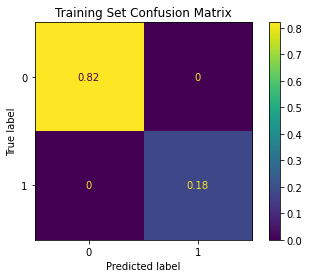

In [21]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict, normalize="all")
plt.title("Training Set Confusion Matrix")
plt.show()

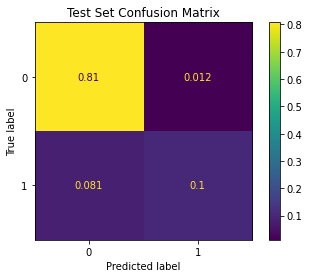

In [22]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict, normalize="all")
plt.title("Test Set Confusion Matrix")
plt.show()

Generating predictions and churn probabilities for all customers in the dataset.

In [23]:
predictions_df = X.merge(cust_features[["churned"]], left_index=True, right_index=True)
predictions_df = predictions_df.rename(columns={"churned":"churned_actual"})
predictions_df["churned_prediction"] = rf_clf.predict(ct.transform(X))
predictions_df["churned_probability"] = rf_clf.predict_proba(ct.transform(X))[:,1]
predictions_df

,risk_tolerance,investment_experience,liquidity_needs,platform,time_spent,instrument_type_first_traded,first_deposit_amount,time_horizon,count,mean,std,min,max,churned_actual,churned_prediction,churned_probability
user_id,,,,,,,,,,,,,,,,
0012db34aa7b083f5714e7831195e54d,high_risk_tolerance,limited_investment_exp,very_important_liq_need,both,9.701933,stock,100.0,long_time_horizon,252,609.100576,191.975127,355.3723,1262.1360,0,0,0.03
001d6c77dbdb3213cead7673f250bfdc,high_risk_tolerance,limited_investment_exp,very_important_liq_need,iOS,19.568433,etp,1500.0,long_time_horizon,252,3307.140361,449.330147,2693.0400,4030.4577,0,0,0.00
002e4653171ddc61c3cd30603cd7bd3e,high_risk_tolerance,limited_investment_exp,somewhat_important_liq_need,iOS,22.091867,stock,100.0,long_time_horizon,128,117.203750,6.480472,100.0000,134.3800,0,0,0.02
00384fa9be6fdca1b786bae70d78f88f,high_risk_tolerance,no_investment_exp,somewhat_important_liq_need,iOS,108.555350,stock,500.0,short_time_horizon,124,462.786815,24.522490,414.4200,518.0000,0,0,0.03
0042aac295a0d4df88f4b83012778bd4,high_risk_tolerance,good_investment_exp,very_important_liq_need,Android,39.973717,lp,100.0,short_time_horizon,252,1561.098745,933.690027,123.5265,2559.1550,0,0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff9ee08791e20724a86995ab2bc72578,high_risk_tolerance,good_investment_exp,very_important_liq_need,iOS,4.703033,mlp,100.0,short_time_horizon,252,92.444723,47.137114,57.7617,259.4046,0,0,0.01
ffa12d2f97e310910291f9b26fb2318d,high_risk_tolerance,good_investment_exp,somewhat_important_liq_need,Android,6.988433,stock,250.0,long_time_horizon,252,6064.207556,1577.089485,2661.6500,8486.5050,0,0,0.00
ffae713096867a32e74f633060667153,med_risk_tolerance,no_investment_exp,very_important_liq_need,Android,8.898000,stock,20.0,med_time_horizon,224,20.166519,7.194193,16.5600,37.5200,0,0,0.10


Identifying importance of features in classification model and listing them in descending order.

In [24]:
important_features = pd.Series(rf_clf.feature_importances_, index=ct.get_feature_names_out()).sort_values(ascending=False)
important_features

remainder__count                                                 0.447516
remainder__min                                                   0.088583
remainder__mean                                                  0.072224
remainder__std                                                   0.069591
remainder__time_spent                                            0.067675
remainder__max                                                   0.067335
remainder__first_deposit_amount                                  0.050033
onehotencoder__liquidity_needs_very_important_liq_need           0.011027
onehotencoder__platform_iOS                                      0.009348
onehotencoder__investment_experience_no_investment_exp           0.009155
onehotencoder__risk_tolerance_high_risk_tolerance                0.008942
onehotencoder__investment_experience_limited_investment_exp      0.008852
onehotencoder__time_horizon_short_time_horizon                   0.008763
onehotencoder__risk_tolerance_med_risk